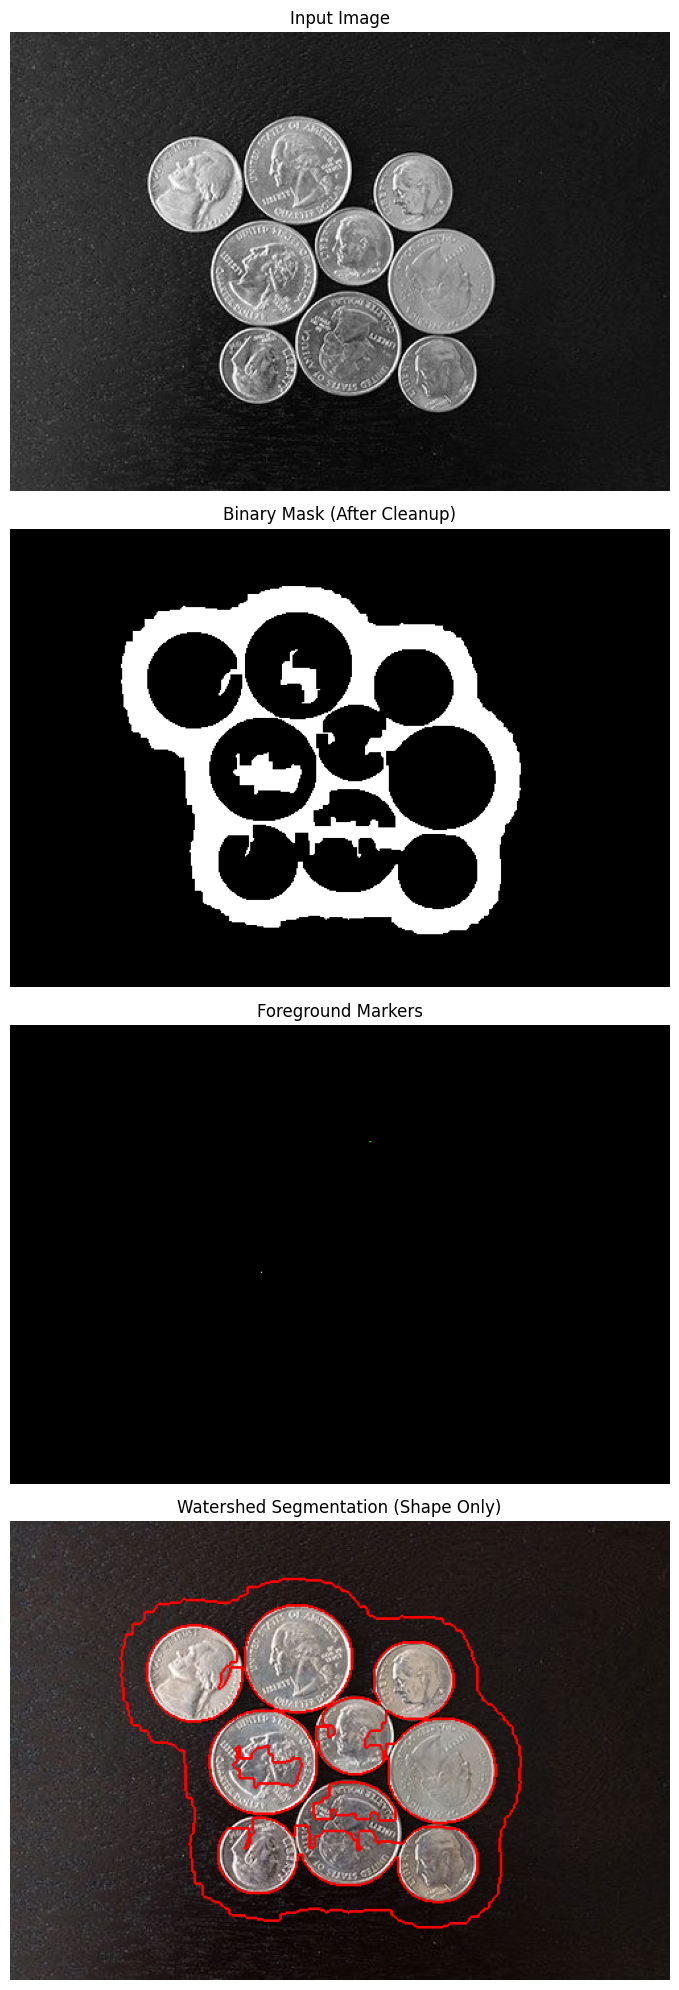

Completed Watershed Segmentation!


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology, segmentation, color, measure

# ==== Load Your Image ====
image_path = "/content/watershed_coins_01.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ==== Preprocessing ====
# Remove noise
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Adaptive threshold to handle shadows
thresh = cv2.adaptiveThreshold(
    blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV, 51, 10
)

# Morphology to close gaps inside coins
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Remove small unwanted objects
clean = morphology.remove_small_objects(closing.astype(bool), min_size=500)

clean = clean.astype(np.uint8) * 255  # convert back to uint8


# ==== Distance Transform for Markers ====
distance = ndi.distance_transform_edt(clean)

# Normalize for visualization (optional)
dist_norm = (distance / distance.max() * 255).astype(np.uint8)

# Find local peaks as markers
local_max = morphology.h_maxima(distance, 8)
markers, _ = ndi.label(local_max)

# ==== Apply Watershed ====
labels = segmentation.watershed(-distance, markers, mask=clean)

# ==== Overlay Boundaries ====
boundaries = segmentation.find_boundaries(labels)
overlay = image.copy()
overlay[boundaries] = [0, 0, 255]  # red boundaries

# ==== Show Results ====
plt.figure(figsize=(12, 20))

plt.subplot(4,1,1)
plt.imshow(gray, cmap='gray')
plt.title("Input Image")
plt.axis("off")

plt.subplot(4,1,2)
plt.imshow(clean, cmap='gray')
plt.title("Binary Mask (After Cleanup)")
plt.axis("off")

plt.subplot(4,1,3)
plt.imshow(markers, cmap='nipy_spectral')
plt.title("Foreground Markers")
plt.axis("off")

plt.subplot(4,1,4)
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation (Shape Only)")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Completed Watershed Segmentation!")
